In [423]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [424]:
df = pd.read_csv('data/telecom_customer_churn.csv')

In [425]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


- **CustomerID** — уникальный идентификатор клиента  
- **Gender** — пол клиента (Male / Female)  
- **Age** — возраст клиента (в годах) на конец Q2 2022  
- **Married** — состоит ли клиент в браке (Yes / No)  
- **Number of Dependents** — количество иждивенцев, проживающих с клиентом  
- **City** — город основного места проживания клиента (Калифорния)  
- **Zip Code** — почтовый индекс места проживания клиента  
- **Latitude** — широта места проживания клиента  
- **Longitude** — долгота места проживания клиента  
- **Number of Referrals** — сколько раз клиент рекомендовал компанию другим людям  
- **Tenure in Months** — срок обслуживания клиента в компании (в месяцах)  
- **Offer** — последняя маркетинговая акция, принятия клиентом (None, Offer A–E)  
- **Phone Service** — подключена ли домашняя телефонная связь (Yes / No)  
- **Avg Monthly Long Distance Charges** — средние ежемесячные расходы на междугороднюю связь  
- **Multiple Lines** — использует ли клиент несколько телефонных линий  
- **Internet Service** — подключён ли интернет у клиента (Yes / No)  
- **Internet Type** — тип интернет-подключения (DSL, Fiber Optic, Cable, None)  
- **Avg Monthly GB Download** — средний месячный объём интернет-трафика (ГБ)  
- **Online Security** — подключена ли услуга онлайн-безопасности  
- **Online Backup** — подключена ли услуга онлайн-резервного копирования  
- **Device Protection Plan** — подключён ли план защиты интернет-оборудования  
- **Premium Tech Support** — подключена ли премиум-техподдержка  
- **Streaming TV** — используется ли интернет для стриминга ТВ  
- **Streaming Movies** — используется ли интернет для стриминга фильмов  
- **Streaming Music** — используется ли интернет для стриминга музыки  
- **Unlimited Data** — подключён ли безлимитный интернет-трафик  
- **Contract** — тип контракта (Month-to-Month, One Year, Two Year)  
- **Paperless Billing** — используется ли электронный биллинг  
- **Payment Method** — способ оплаты (Bank Withdrawal, Credit Card, Mailed Check)  
- **Monthly Charge** — текущий ежемесячный платёж за все услуги  
- **Total Charges** — суммарные начисления клиенту за всё время  
- **Total Refunds** — суммарные возвраты средств клиенту  
- **Total Extra Data Charges** — доплаты за превышение лимита интернет-трафика  
- **Total Long Distance Charges** — суммарные расходы на междугороднюю связь  
- **Total Revenue** — общий доход компании от клиента  
- **Customer Status** — статус клиента на конец квартала (Churned / Stayed / Joined)  
- **Churn Category** — укрупнённая категория причины оттока  
- **Churn Reason** — конкретная причина ухода клиента 

In [426]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

Есть ли дубликаты в датафрейме?

In [427]:
df.duplicated().sum()

0

In [428]:
is_null = df.isnull().mean()
is_null[is_null > 0.2]

Offer                      0.550476
Internet Type              0.216669
Avg Monthly GB Download    0.216669
Online Security            0.216669
Online Backup              0.216669
Device Protection Plan     0.216669
Premium Tech Support       0.216669
Streaming TV               0.216669
Streaming Movies           0.216669
Streaming Music            0.216669
Unlimited Data             0.216669
Churn Category             0.734630
Churn Reason               0.734630
dtype: float64

Столбцы где пропусков больше 20% удаляем

In [429]:
df.drop(columns=is_null[is_null > 0.2].index, inplace=True)

In [430]:
is_null = df.isnull().mean()
is_null

Customer ID                          0.000000
Gender                               0.000000
Age                                  0.000000
Married                              0.000000
Number of Dependents                 0.000000
City                                 0.000000
Zip Code                             0.000000
Latitude                             0.000000
Longitude                            0.000000
Number of Referrals                  0.000000
Tenure in Months                     0.000000
Phone Service                        0.000000
Avg Monthly Long Distance Charges    0.096834
Multiple Lines                       0.096834
Internet Service                     0.000000
Contract                             0.000000
Paperless Billing                    0.000000
Payment Method                       0.000000
Monthly Charge                       0.000000
Total Charges                        0.000000
Total Refunds                        0.000000
Total Extra Data Charges          

In [431]:
df['Avg Monthly Long Distance Charges'] = df['Avg Monthly Long Distance Charges'].fillna(df['Avg Monthly Long Distance Charges'].median())
df['Multiple Lines'] = df['Multiple Lines'].fillna(df['Multiple Lines'].mode().iloc[0])

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Number of Dependents'}>,
        <Axes: title={'center': 'Zip Code'}>,
        <Axes: title={'center': 'Latitude'}>],
       [<Axes: title={'center': 'Longitude'}>,
        <Axes: title={'center': 'Number of Referrals'}>,
        <Axes: title={'center': 'Tenure in Months'}>,
        <Axes: title={'center': 'Avg Monthly Long Distance Charges'}>],
       [<Axes: title={'center': 'Monthly Charge'}>,
        <Axes: title={'center': 'Total Charges'}>,
        <Axes: title={'center': 'Total Refunds'}>,
        <Axes: title={'center': 'Total Extra Data Charges'}>],
       [<Axes: title={'center': 'Total Long Distance Charges'}>,
        <Axes: title={'center': 'Total Revenue'}>, <Axes: >, <Axes: >]],
      dtype=object)

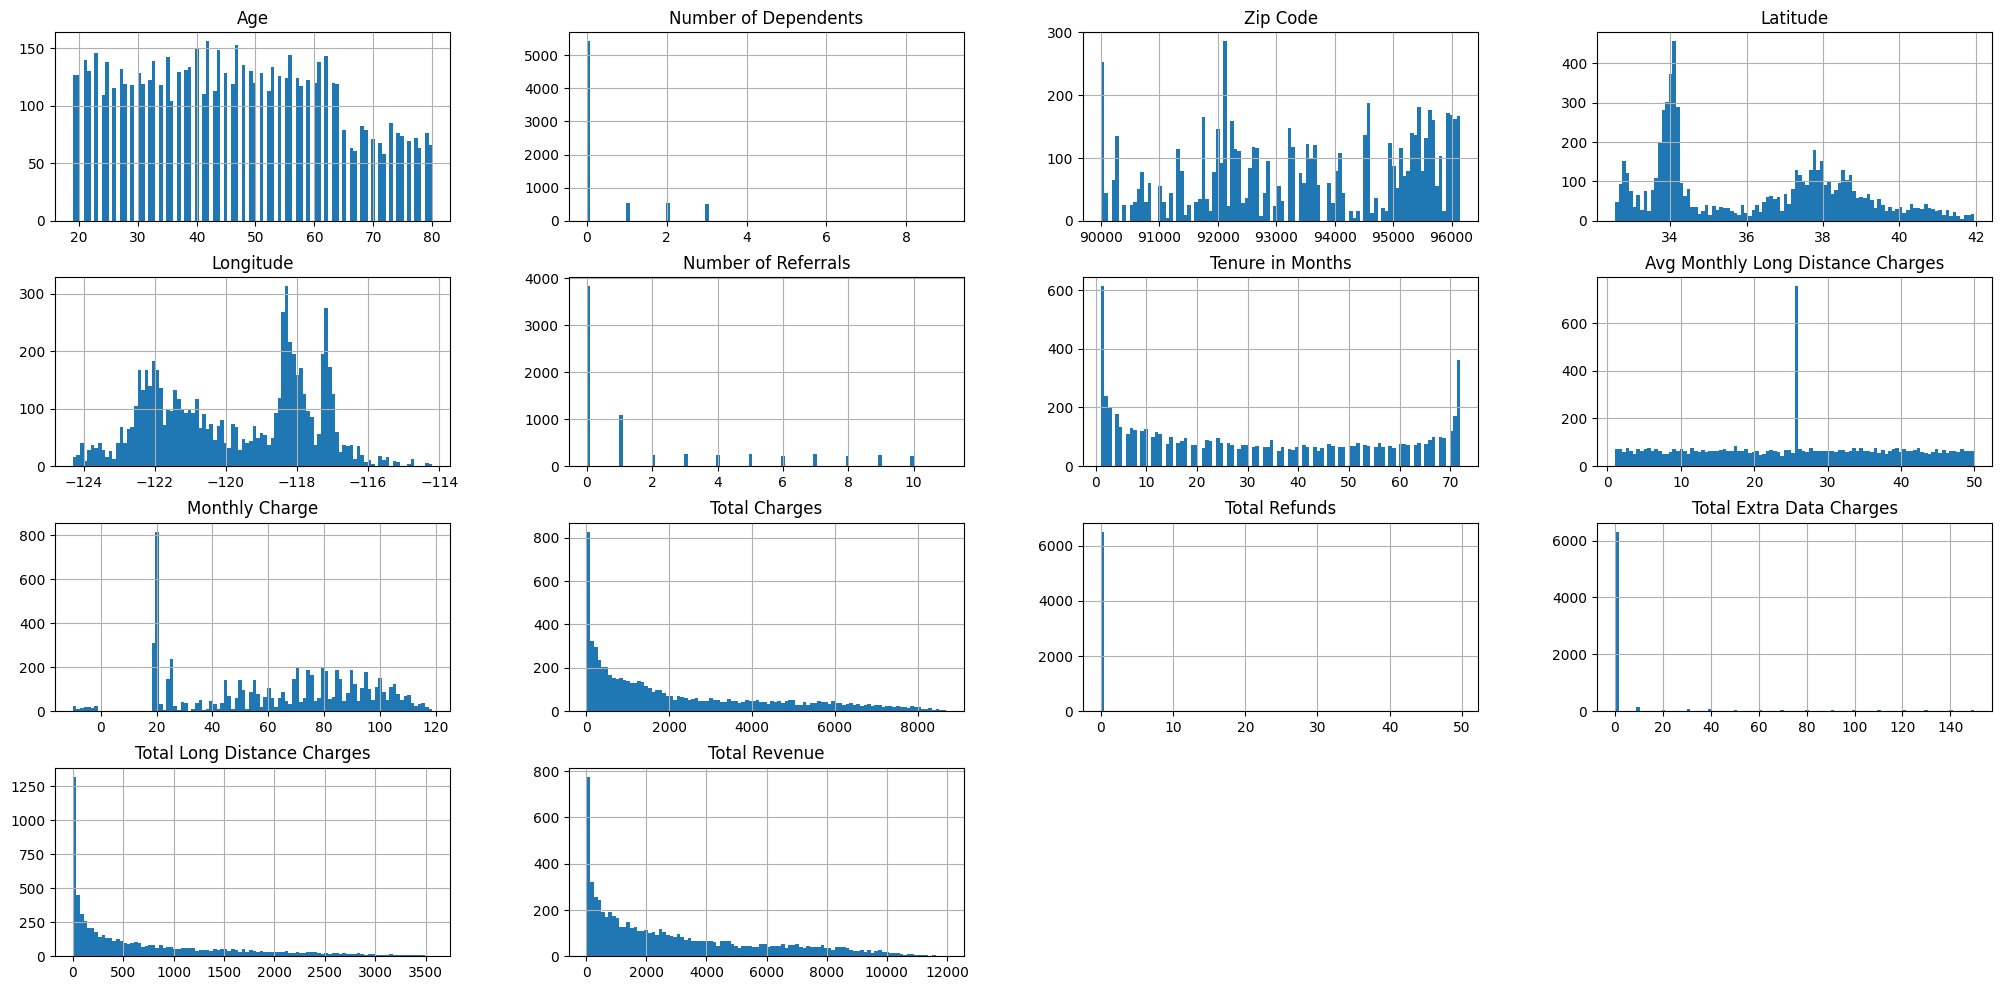

In [432]:
df.hist(bins=100, figsize=(25, 12))

In [433]:
df.describe()

,Age,Number of Dependents,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,46.509726,0.468692,93486.070567,36.197455,-119.756684,1.951867,32.386767,25.446612,63.596131,2280.381264,1.962182,6.860713,749.099262,3034.379056
std,16.750352,0.962802,1856.767505,2.468929,2.154425,3.001199,24.542061,13.495466,31.204743,2266.220462,7.902614,25.104978,846.660055,2865.204542
min,19.000000,0.000000,90001.000000,32.555828,-124.301372,0.000000,1.000000,1.010000,-10.000000,18.800000,0.000000,0.000000,0.000000,21.360000
25%,32.000000,0.000000,92101.000000,33.990646,-121.788090,0.000000,9.000000,14.455000,30.400000,400.150000,0.000000,0.000000,70.545000,605.610000
50%,46.000000,0.000000,93518.000000,36.205465,-119.595293,0.000000,29.000000,25.690000,70.050000,1394.550000,0.000000,0.000000,401.440000,2108.640000
75%,60.000000,0.000000,95329.000000,38.161321,-117.969795,3.000000,55.000000,36.395000,89.750000,3786.600000,0.000000,0.000000,1191.100000,4801.145000
max,80.000000,9.000000,96150.000000,41.962127,-114.192901,11.000000,72.000000,49.990000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000


In [434]:
df.describe(include='object')

,Customer ID,Gender,Married,City,Phone Service,Multiple Lines,Internet Service,Contract,Paperless Billing,Payment Method,Customer Status
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,1106,2,2,2,3,2,3,3
top,0002-ORFBO,Male,No,Los Angeles,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,Stayed
freq,1,3555,3641,293,6361,4072,5517,3610,4171,3909,4720


In [435]:
cats = ['Gender', 'Married', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Contract', 'Paperless Billing',
       'Payment Method', 'Customer Status']

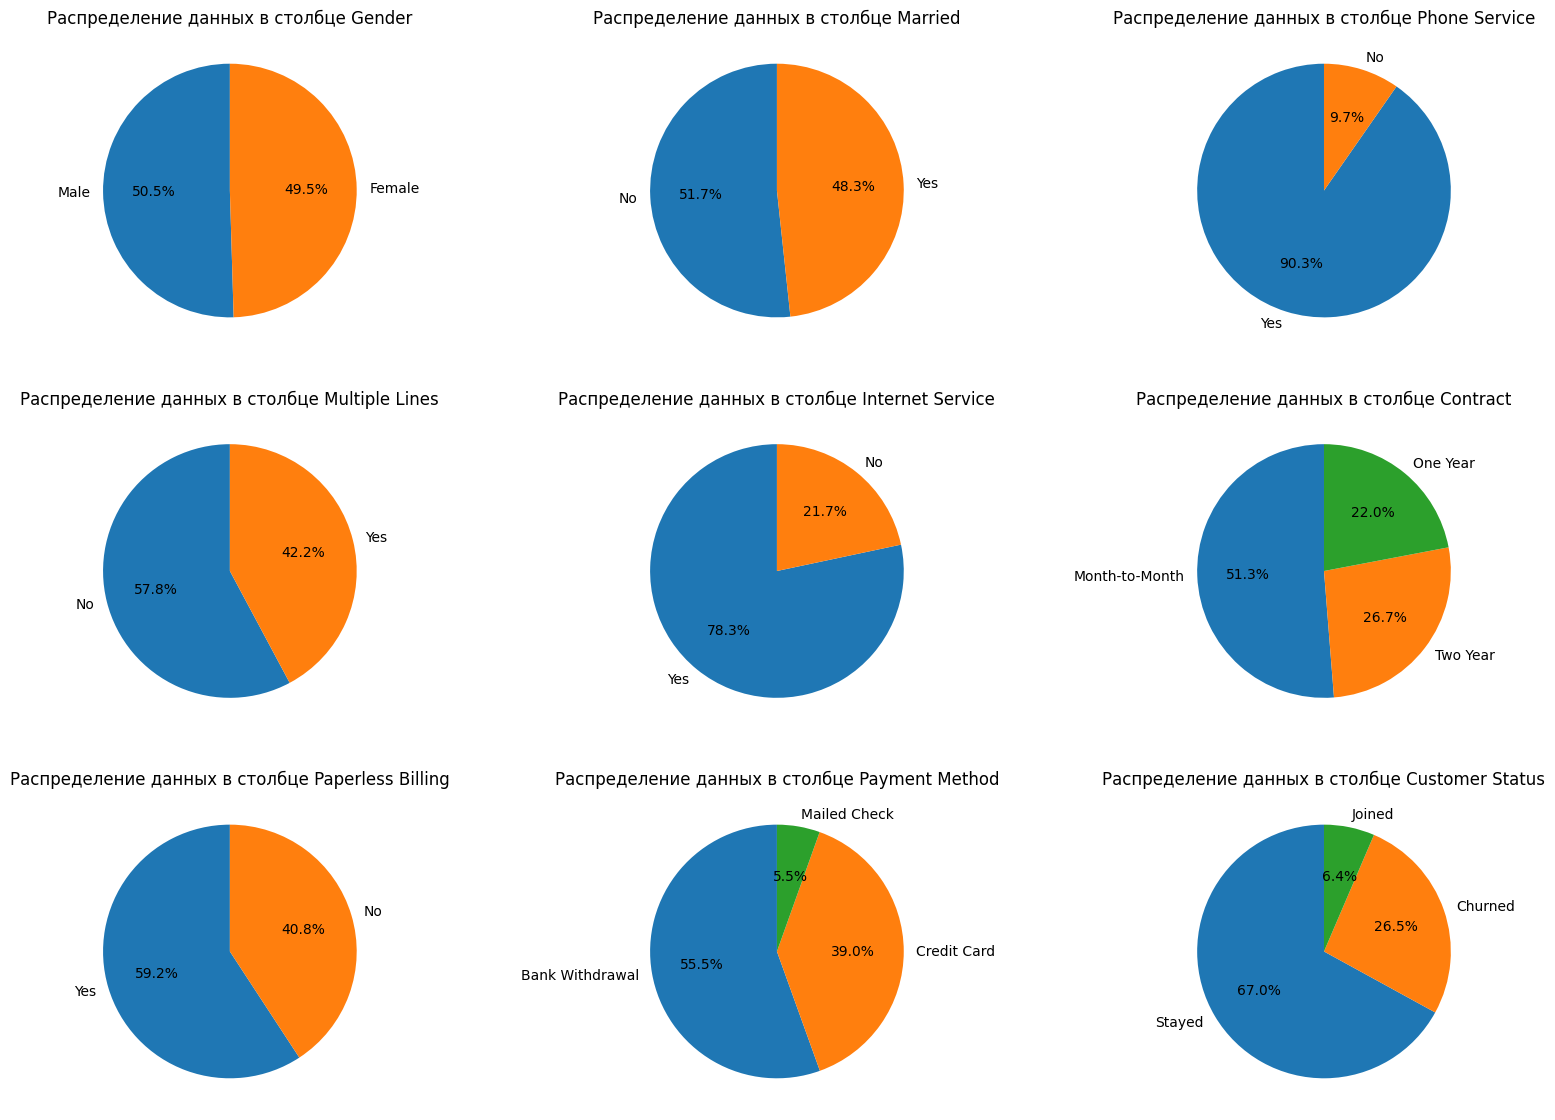

In [436]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(cats):
	info = df[col].value_counts()
	axes[i].pie(
		info,
		labels=info.index,
		autopct='%.1f%%',
		startangle=90,
		
	)
	axes[i].set_title(f'Распределение данных в столбце {col}')


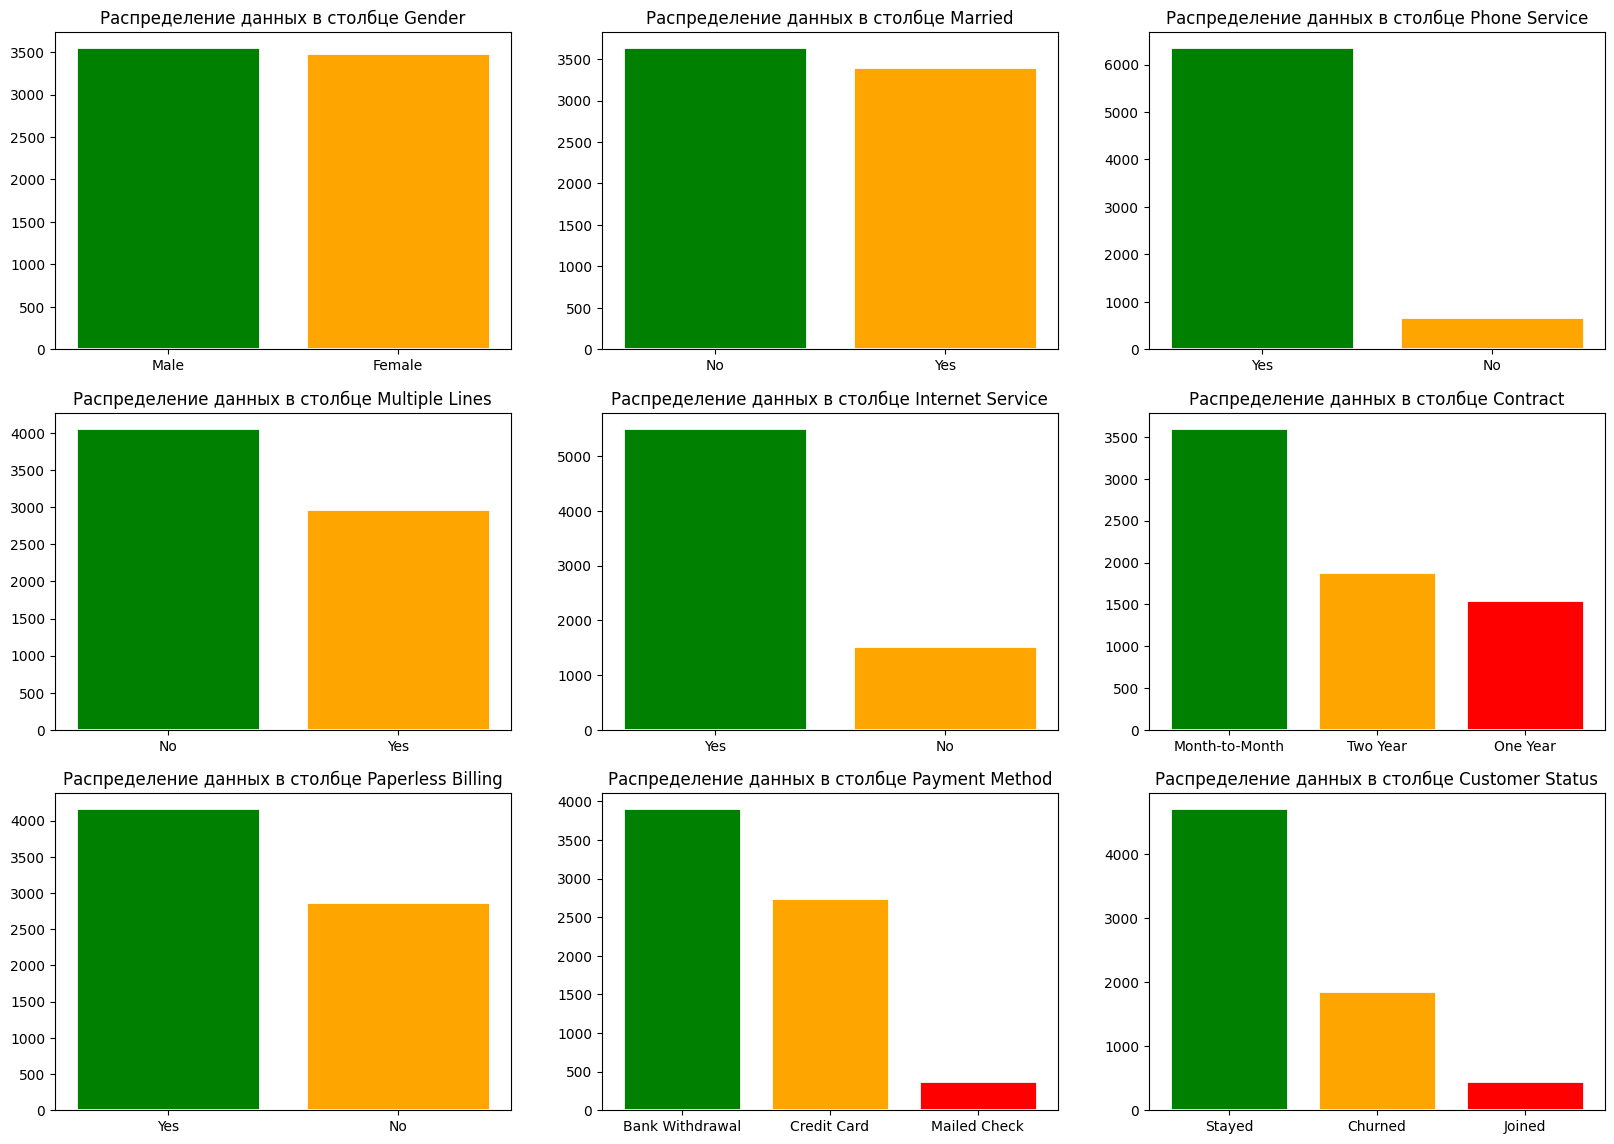

In [437]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(cats):
	info = df[col].value_counts()
	colors = ['green', 'orange', 'red', 'brown', 'blue']
	axes[i].bar(
		info.index,
		info,
		color = colors[:info.shape[0]],
		edgecolor='white',
		linewidth=2
		
	)
	axes[i].set_title(f'Распределение данных в столбце {col}')

Выкинем joined клиентов. Решаем задачу бинарной классификации

In [438]:
df.drop(df[df['Customer Status'] == 'Joined'].index, inplace=True)

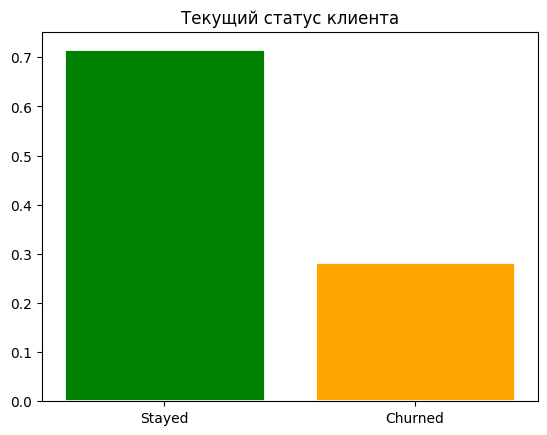

In [439]:
plt.bar(
	df['Customer Status'].value_counts().index,
	df['Customer Status'].value_counts(normalize=True),
	color = ['green', 'orange'],
	edgecolor='white',
	linewidth=2
)

plt.title('Текущий статус клиента')
plt.show()

In [440]:
df['Customer Status'] = df['Customer Status'].replace({'Stayed': 0, 'Churned': 1})

C:\Users\ivans\AppData\Local\Temp\ipykernel_25656\3496228316.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Customer Status'] = df['Customer Status'].replace({'Stayed': 0, 'Churned': 1})


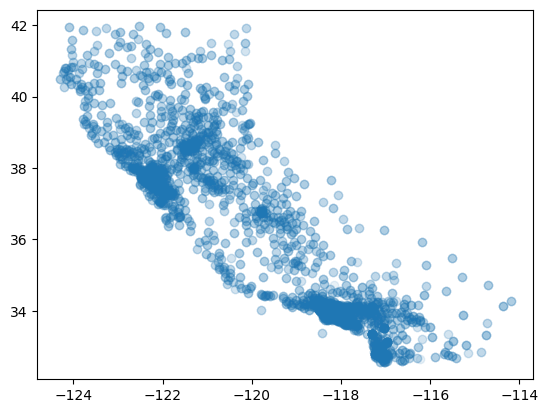

In [441]:
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.1)
plt.show()

In [442]:
# выкинем столбцы как признаки, не несущие информации о статусе
df.drop(columns=['Latitude', 'Longitude', 'Zip Code', 'Customer ID'], inplace=True)

In [443]:
df.describe()

,Age,Number of Dependents,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
count,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000,6589.000000
mean,46.760510,0.476097,2.020944,34.499772,25.515183,65.030695,2432.042243,2.080938,7.169525,798.087251,3235.218082,0.283655
std,16.841362,0.968499,3.024016,23.968734,13.486731,31.100727,2265.500080,8.125054,25.803163,853.767972,2854.600036,0.450805
min,19.000000,0.000000,0.000000,1.000000,1.010000,-10.000000,18.850000,0.000000,0.000000,0.000000,21.610000,0.000000
25%,33.000000,0.000000,0.000000,12.000000,14.510000,35.800000,544.550000,0.000000,0.000000,106.680000,835.450000,0.000000
50%,46.000000,0.000000,0.000000,32.000000,25.690000,71.050000,1563.900000,0.000000,0.000000,472.680000,2376.450000,0.000000
75%,60.000000,0.000000,3.000000,57.000000,36.440000,90.400000,4003.000000,0.000000,0.000000,1275.120000,5106.640000,1.000000
max,80.000000,9.000000,11.000000,72.000000,49.990000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,1.000000


In [444]:
df.describe(include='object')

,Gender,Married,City,Phone Service,Multiple Lines,Internet Service,Contract,Paperless Billing,Payment Method
count,6589,6589,6589,6589,6589,6589,6589,6589,6589
unique,2,2,1106,2,2,2,3,2,3
top,Male,Yes,San Diego,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3312,3318,278,5945,3663,5245,3202,3974,3728


<Axes: >

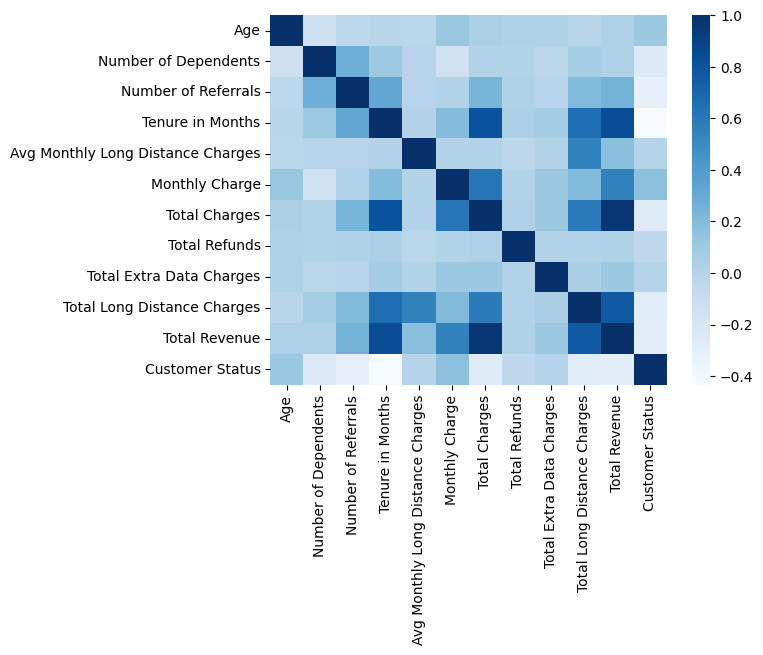

In [445]:
corr = df.corr(numeric_only=True)

sns.heatmap(corr, cmap='Blues')

Удаляем столбцы 'Total Revenue', 'Total Charges' как сильно скоррелированные, столбец City как категориальный признак со слишком большим количеством категорий

In [446]:
df.drop(columns=['Total Revenue', 'Total Charges', 'City'], inplace=True)

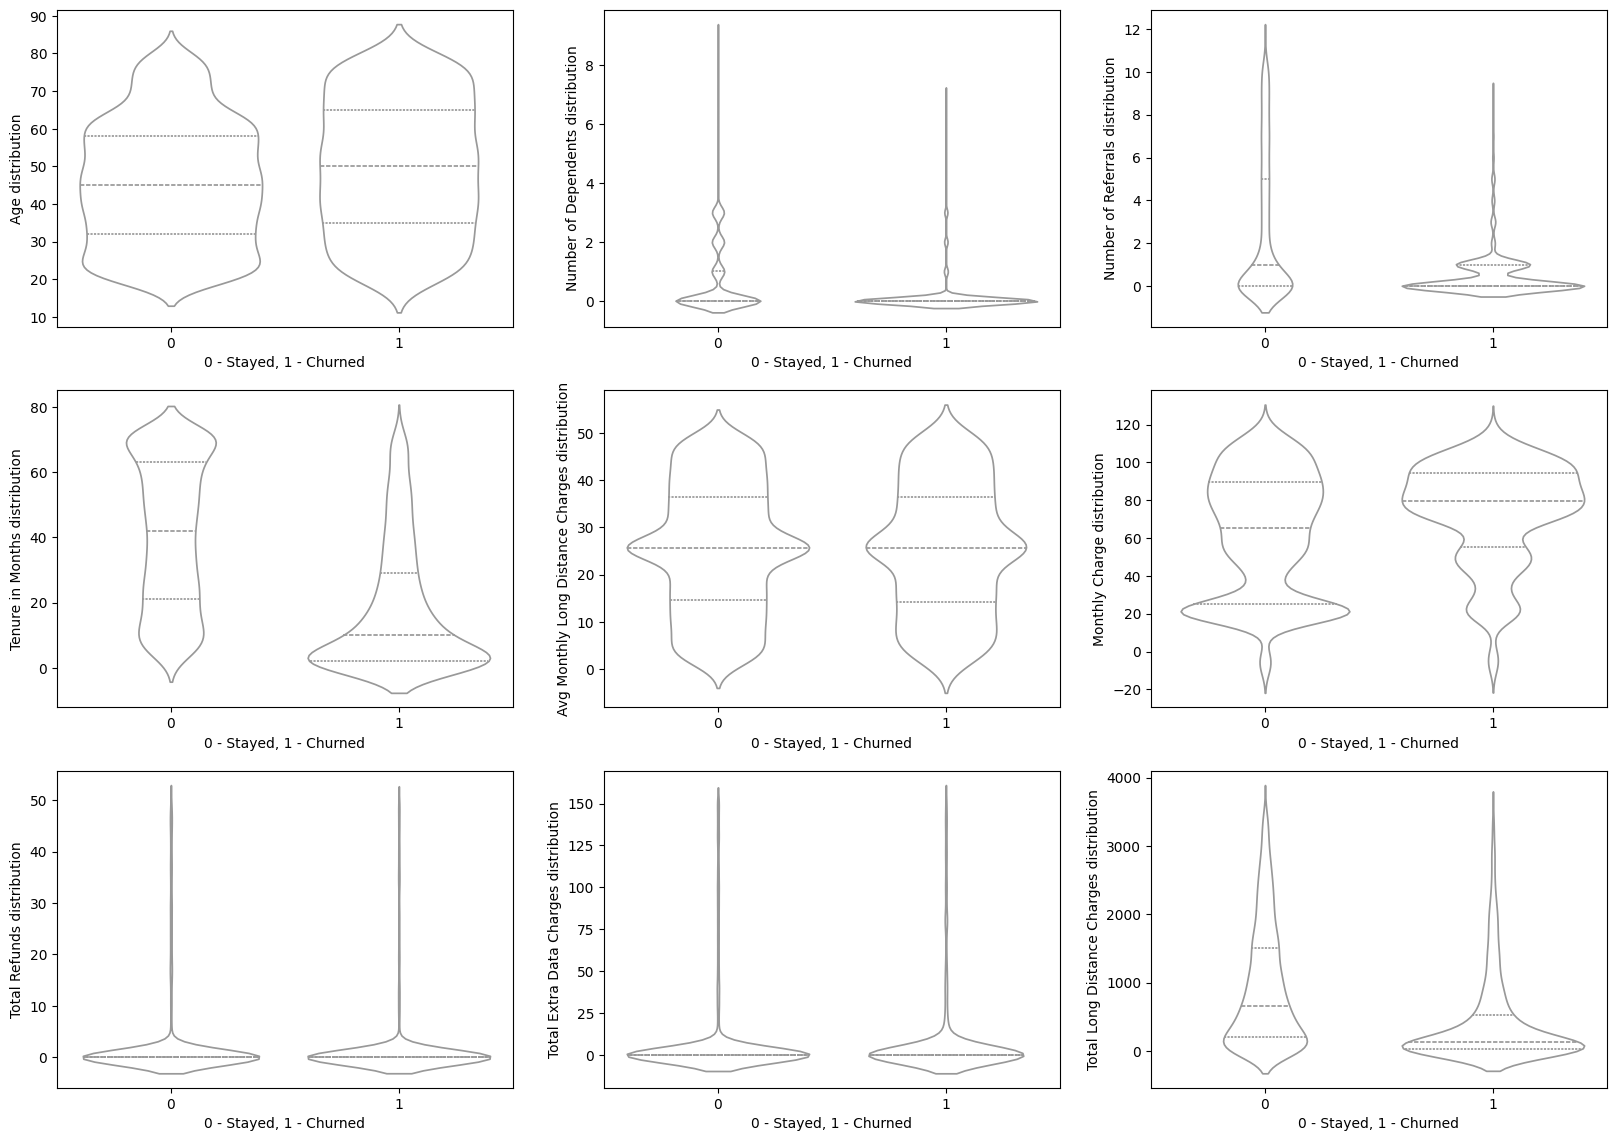

In [447]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
axes = axes.flatten()
numeric_cols = ['Age', 'Number of Dependents', 'Number of Referrals',
				'Tenure in Months', 'Avg Monthly Long Distance Charges',
				'Monthly Charge', 'Total Refunds', 'Total Extra Data Charges',
				'Total Long Distance Charges']

for i, col in enumerate(numeric_cols):
	sns.violinplot(
		x=df['Customer Status'], 
		y=df[col], inner='quartile', 
		color='white',
		ax=axes[i]
	)
	axes[i].set_xlabel('0 - Stayed, 1 - Churned')
	axes[i].set_ylabel(f'{col} distribution')

По графику видно, что наиболее отличающиеся по распределению для разных категорий Customer Status признаки - это Number of Dependents, Number of Referrals, Tenure in Months, Monthly Charge и Total Long Distance Charges distribution.

То есть именно по этим признакам "поведение" Stayed и Churned клиентов отличается

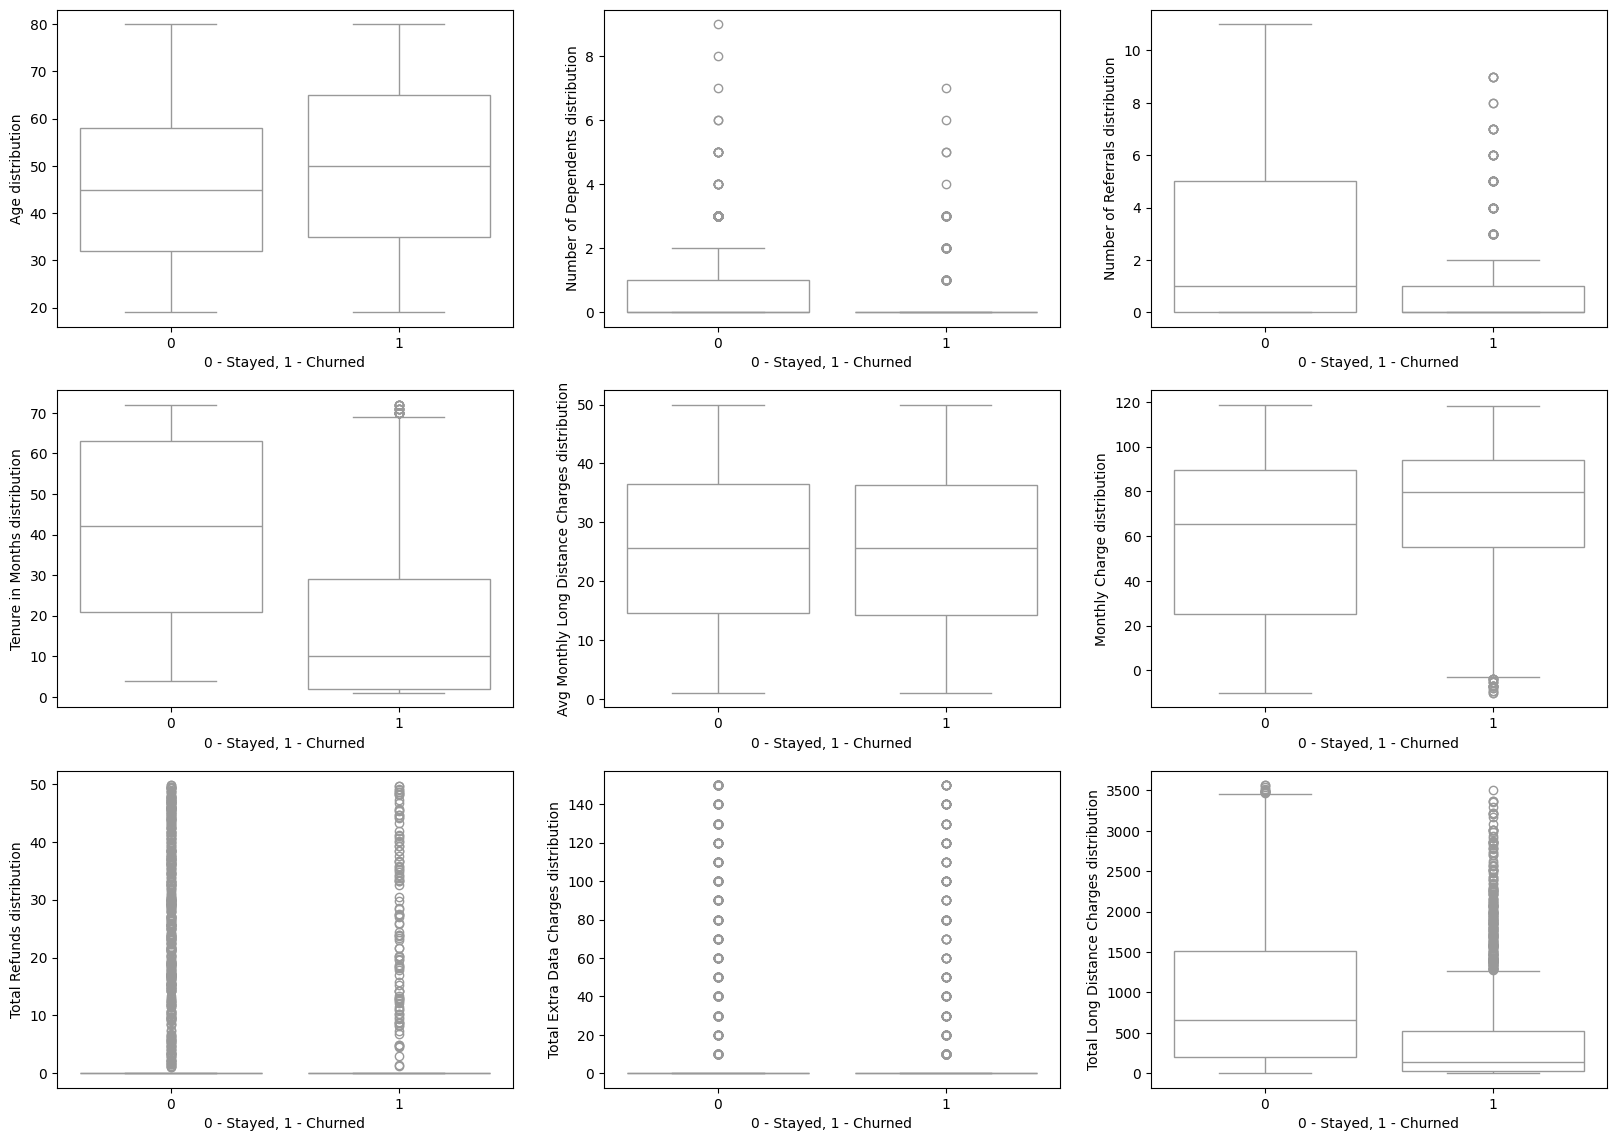

In [448]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
	sns.boxplot(
		x=df['Customer Status'], 
		y=df[col], 
		color='white',
		ax=axes[i]
	)
	axes[i].set_xlabel('0 - Stayed, 1 - Churned')
	axes[i].set_ylabel(f'{col} distribution')

In [449]:
cats.pop(-1)

'Customer Status'

In [450]:
df['Gender'].nunique()

2

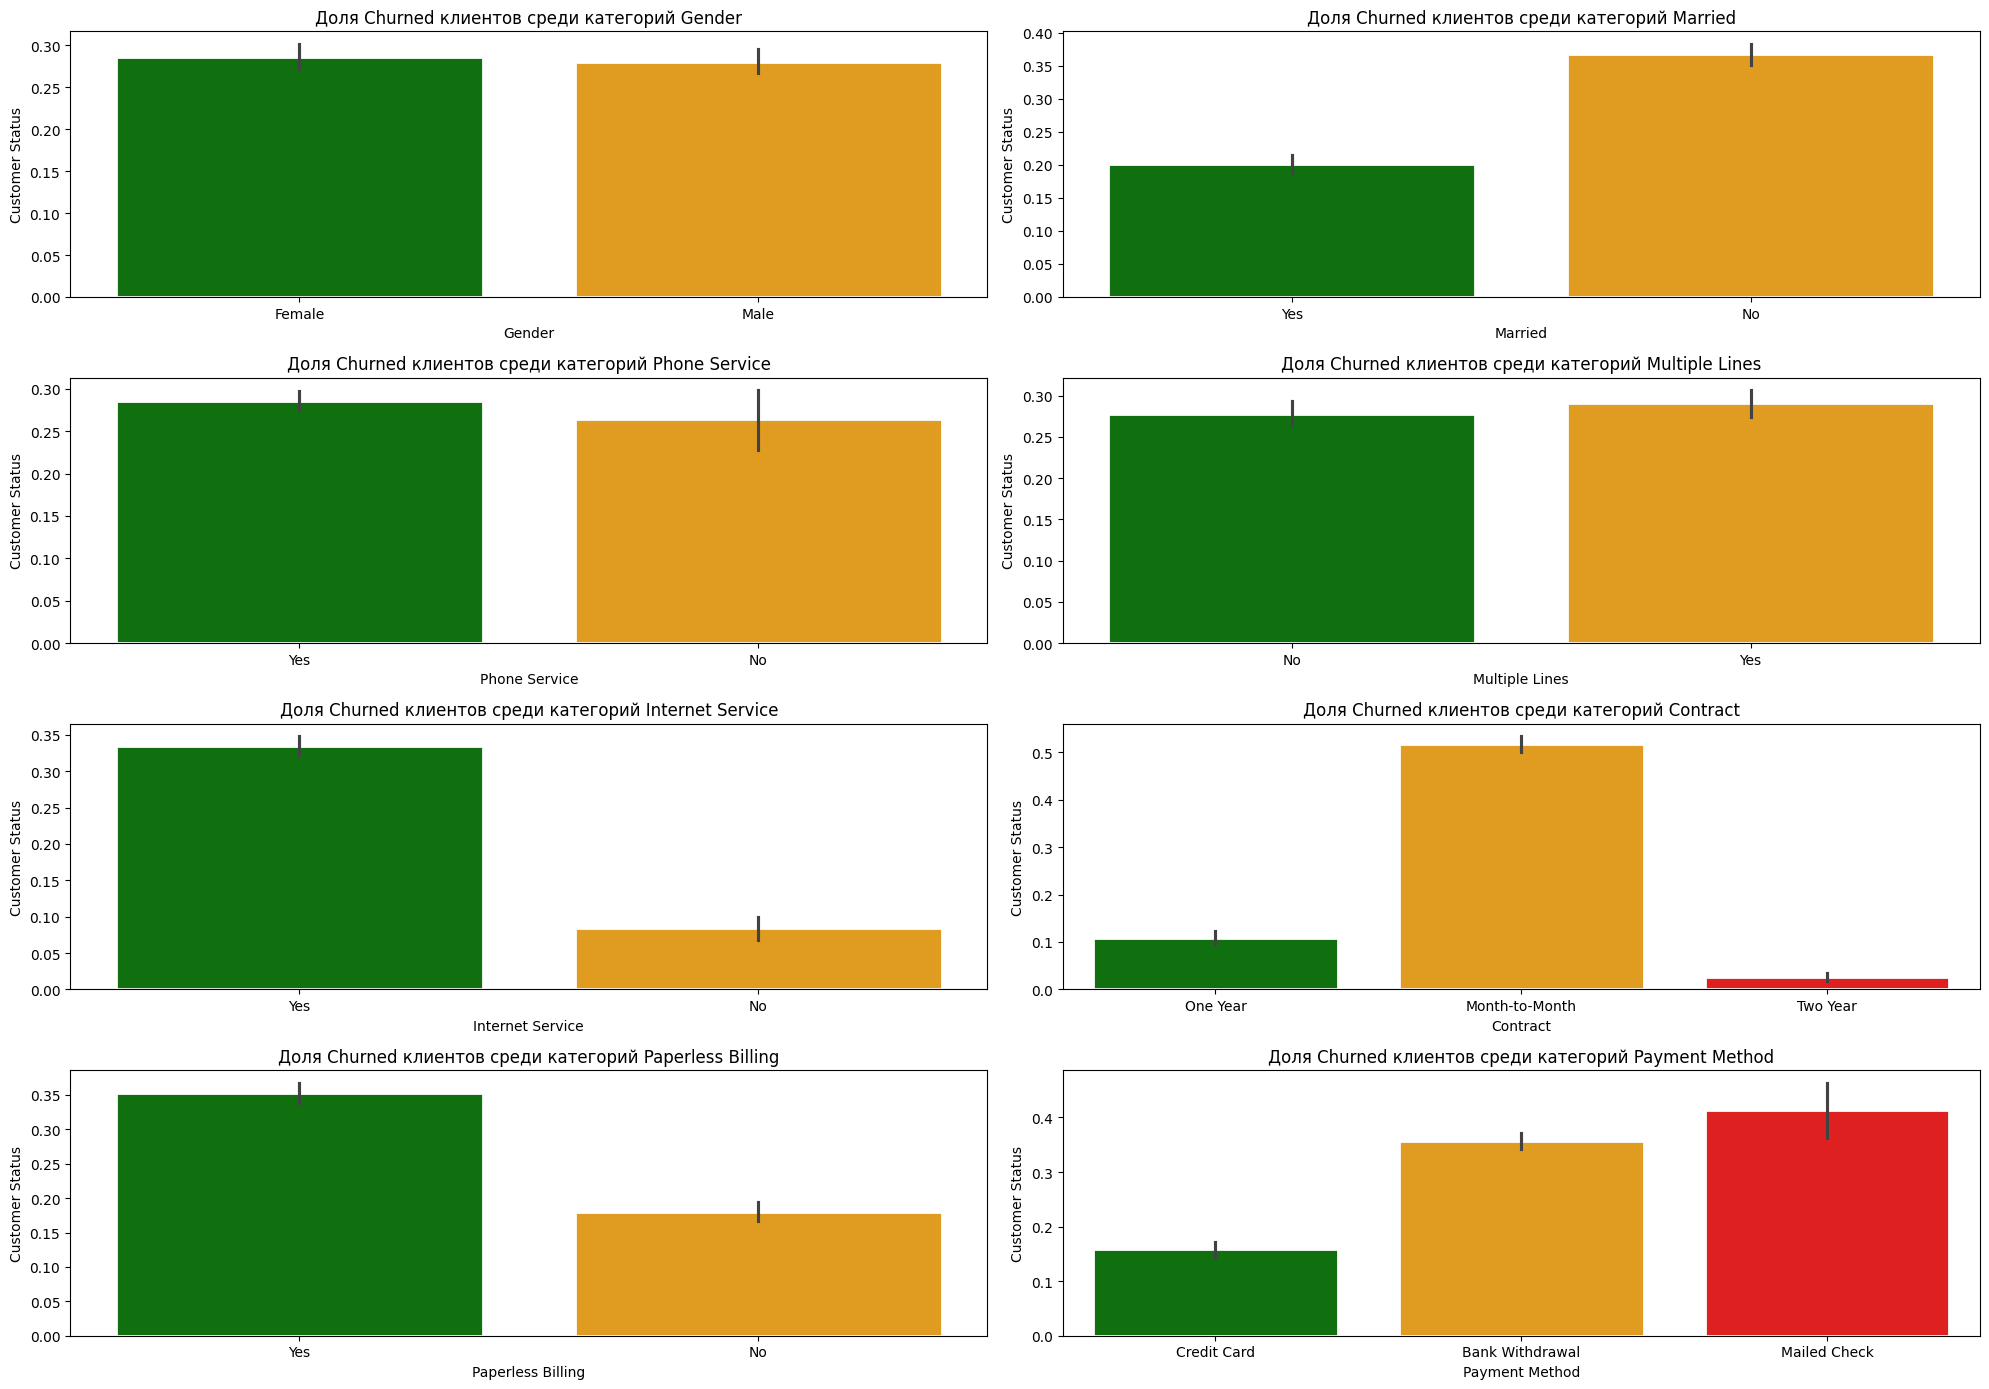

In [451]:
fig, axes = plt.subplots(4, 2, figsize=(20, 14))
axes = axes.flatten()
colors = ['green', 'orange', 'red', 'brown', 'blue']

for i, col in enumerate(cats):
	sns.barplot(
		y=df['Customer Status'],
		x=df[col],
		hue=df[col],
		palette=colors[:df[col].nunique()],
		edgecolor='white',
		linewidth=2,
		ax=axes[i]
	)
	axes[i].set_xlabel(col)
	axes[i].set_ylabel('Customer Status')
	axes[i].set_title(f'Доля Churned клиентов среди категорий {col}')

plt.tight_layout()

1) Для пользователей интернет услуг доля оттока превышает 30%.
2) Для клиентов с помесячным контрактом доля оттока превышает 50%, тогда как для двухлетних контрактов она близка к нулю.
3) Для клиентов с электронной оплатой доля оттока около 35%.

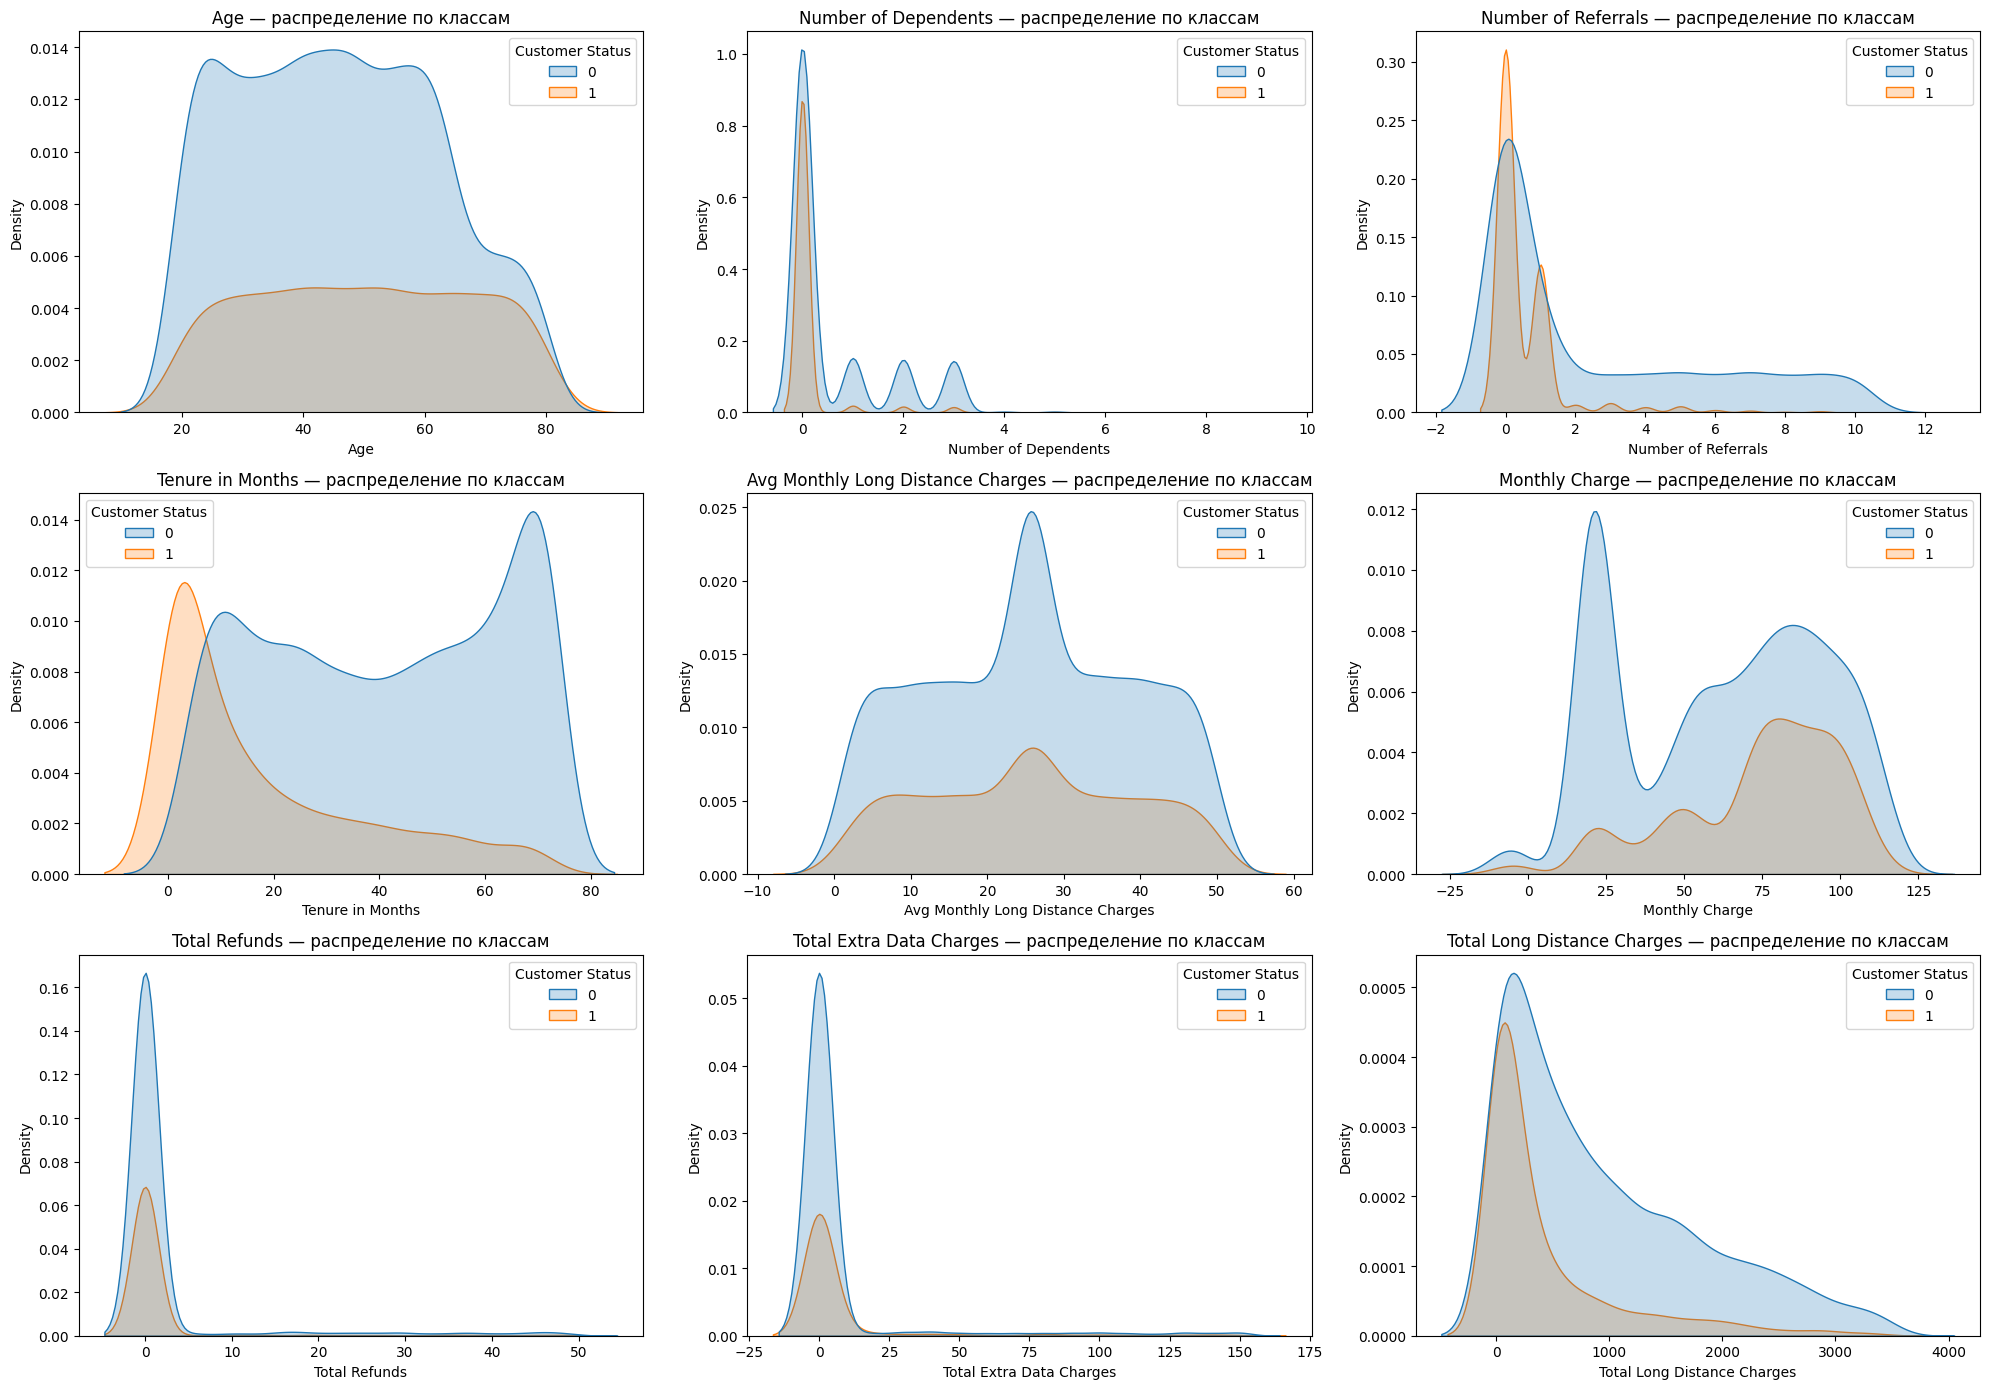

In [452]:
fig, axes = plt.subplots(3, 3, figsize=(20, 14))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.kdeplot(
        data=df, 
        x=col, 
        hue='Customer Status', 
        fill=True,
        ax=axes[i]
    )

    axes[i].set_title(f'{col} — распределение по классам')

plt.tight_layout()

Посчитаем корреляцию между категориальными признаками с помощью V-меры Крамера:

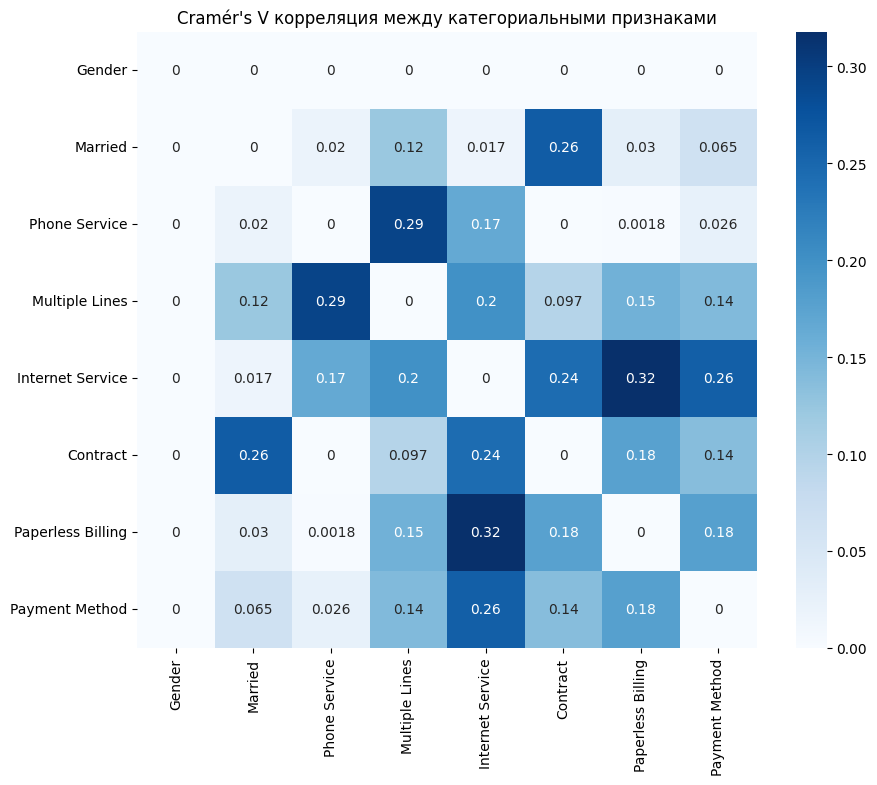

In [453]:
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Применим ко всем категориальным признакам
cat_cols = df.select_dtypes(include='object').columns
n = len(cat_cols)
cramers_results = pd.DataFrame(np.zeros((n, n)), columns=cat_cols, index=cat_cols)

for c1 in cat_cols:
    for c2 in cat_cols:
        if c1 != c2:
            cramers_results.loc[c1, c2] = cramers_v(df[c1], df[c2])

plt.figure(figsize=(10,8))
sns.heatmap(cramers_results, annot=True, cmap='Blues')
plt.title("Cramér's V корреляция между категориальными признаками")
plt.show()


Корреляции незначительные, оставляем все как есть

Оценим мультиколлинеарность признаков с помощью VIF:

In [454]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_cols
vif_data['VIF'] = [variance_inflation_factor(df[numeric_cols].values, i) for i in range(df[numeric_cols].shape[1])]
vif_data.sort_values('VIF', ascending=False)

,Feature,VIF
3,Tenure in Months,6.323035
0,Age,6.146062
4,Avg Monthly Long Distance Charges,5.932247
8,Total Long Distance Charges,5.393155
5,Monthly Charge,5.047563
2,Number of Referrals,1.730257
1,Number of Dependents,1.342100
7,Total Extra Data Charges,1.095412
6,Total Refunds,1.067485


In [455]:
df.drop(columns=['Total Long Distance Charges'], inplace=True)

num_cols = df.select_dtypes(include=np.number).columns.drop('Customer Status')
vif_data = pd.DataFrame()
vif_data['Feature'] = num_cols
vif_data['VIF'] = [variance_inflation_factor(df[num_cols].values, i) for i in range(df[num_cols].shape[1])]
vif_data.sort_values('VIF', ascending=False)

,Feature,VIF
0,Age,5.300580
5,Monthly Charge,5.033636
4,Avg Monthly Long Distance Charges,3.632211
3,Tenure in Months,3.449160
2,Number of Referrals,1.729660
1,Number of Dependents,1.333436
7,Total Extra Data Charges,1.095096
6,Total Refunds,1.067190


In [456]:
df.to_csv('preprocessed.csv', index=False)